In [163]:
#
#SET THE KERNEL BEFORE STARTING! 
#


#kernel-> change kernel -> name of your ML4Science kernel


#Imports
import subprocess
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import os
import copy 

from nilearn.plotting import plot_img, plot_glass_brain
import matplotlib.pyplot as plt


# repetition has to be known
TR = 0.72 

# Try to load one fMRI file (files are saving as individual TRs .nii files)

Note that the data have already been preprocessed (removal of nuosance regressor, coregistration, normalization to mni)

In [165]:
main_dir=os.getcwd()
HCP_dir='../../../../miplab-nas2/HCP-Data'
paradigm_dir=os.path.join(HCP_dir,'HCP_100unrelated_TaskParadigms')
fMRI_dir=os.path.join(HCP_dir,'HCP_100unrelated_preprocessed_ERG/data')

In [288]:
#Choose subject and task
subject='113619'
tasktype='MOTOR'

In [289]:
##List files in the directory and print them
PRINT_FILES=True
if(PRINT_FILES):
    files = os.listdir(paradigm_dir)
    for file in files:
        print(file)

100307_Regressor_tfMRI_SOCIAL_RL.mat
100408_Regressor_tfMRI_LANGUAGE_LR.mat
100408_Regressor_tfMRI_RELATIONAL_LR.mat
101309_Regressor_tfMRI_GAMBLING_RL.mat
101915_Regressor_tfMRI_EMOTION_RL.mat
103111_Regressor_tfMRI_EMOTION_LR.mat
103818_Regressor_tfMRI_WM_LR.mat
105014_Regressor_tfMRI_WM_LR.mat
111312_Regressor_tfMRI_SOCIAL_LR.mat
111312_Regressor_tfMRI_SOCIAL_RL.mat
115320_Regressor_tfMRI_LANGUAGE_LR.mat
115320_Regressor_tfMRI_MOTOR_LR.mat
116524_Regressor_tfMRI_EMOTION_LR.mat
120111_Regressor_tfMRI_EMOTION_RL.mat
120111_Regressor_tfMRI_SOCIAL_LR.mat
122317_Regressor_tfMRI_GAMBLING_LR.mat
122317_Regressor_tfMRI_WM_RL.mat
128127_Regressor_tfMRI_EMOTION_LR.mat
128127_Regressor_tfMRI_EMOTION_RL.mat
128127_Regressor_tfMRI_WM_LR.mat
128632_Regressor_tfMRI_LANGUAGE_LR.mat
130013_Regressor_tfMRI_EMOTION_LR.mat
130316_Regressor_tfMRI_EMOTION_RL.mat
133019_Regressor_tfMRI_GAMBLING_LR.mat
136833_Regressor_tfMRI_GAMBLING_RL.mat
136833_Regressor_tfMRI_SOCIAL_LR.mat
147737_Regressor_tfMRI_EMOTIO

In [290]:
#Files are inside the subject firectory and they 
filename_one_tr=os.path.join(fMRI_dir,subject,'tfMRI_'+tasktype+'_RL/fMRIvols_GLMyes/Cov_ftfMRI_'+tasktype+'_RL0190.nii')

nibfile = nib.load(filename_one_tr)
tmp = nibfile.get_fdata()
affine = nibfile.affine
#plt.plot(tmp[30,:,:])

# Create a 4D nifti file stacking the individual TRs

In [291]:
import glob
from nilearn import image

nii_directory=os.path.join(fMRI_dir,subject,'tfMRI_'+tasktype+'_RL/fMRIvols_GLMyes/')
nii_files = sorted(glob.glob(nii_directory + '*.nii'))  # Get all .nii files

# Load the first NIfTI file to get the header and affine which are shared across TRs
first_img = nib.load(nii_files[0])
data = first_img.get_fdata()  # 3D data from the first file

# Create an empty array to hold the 4D data
data_4d = np.zeros((data.shape[0], data.shape[1], data.shape[2], len(nii_files)))

# Load each .nii file and fill the 4D array
for i, nii_file in enumerate(nii_files):
    
    #Print to Check the timing of the slices if correct 
    #print(nii_file)
    
    img = nib.load(nii_file)
    
    #----------Applying smoothing!!!!!!!!!!!!!!!!!!! the second argument is the mm----------------
    img = image.smooth_img(img, 5)

    data_4d[..., i] = img.get_fdata()  # Fill the 4th dimension

# Create a new NIfTI image
new_img = nib.Nifti1Image(data_4d, affine=first_img.affine, header=first_img.header)

# Save the 4D image as .nii.gz
filename=subject+'_tfMRI_'+tasktype+'_RL_fMRIvols_GLMyes_4D_image.nii.gz'

#Example temporary saving path
saving_path='/home/fpetruso/tmp_ml4science/'+filename
#saving_path='/Users/flhi1/Documents/PhD/code/ML4SCIENCE/'+filename
#saving_path='/data/PhD/code/ML4SCIENCE/'+filename

nib.save(new_img, saving_path)

#Check dimensions
print(data_4d.shape) #last is time

(91, 109, 91, 284)


In [292]:
# Try with different FWHM smoothing
# from nilearn import image
# 
# print(first_img)
# #tHIS IS AN EXAMPLE OF SMOOTHING ON ONE TIME POINT, 
# for smoothing in range(0, 25, 5):
#     smoothed_img = image.smooth_img(first_img, smoothing)
#     plotting.plot_epi(smoothed_img, title=f"Smoothing {int(smoothing)}mm")
# 
# plotting.show()

In [293]:
#Plot the last TR
# plotting.plot_epi(img, title=f"Smoothing {int(smoothing)}mm")
# plotting.show()

In [294]:
#If you only want to load a previously generated 4d file

#fMRI_img_path='/home/fpetruso/tmp_ml4science/4d_image.nii.gz'
#fourd_data = nib.load(fMRI_img_path)
#fourd_data.shape

# Plot the corresponding regressor 


(1, 284)


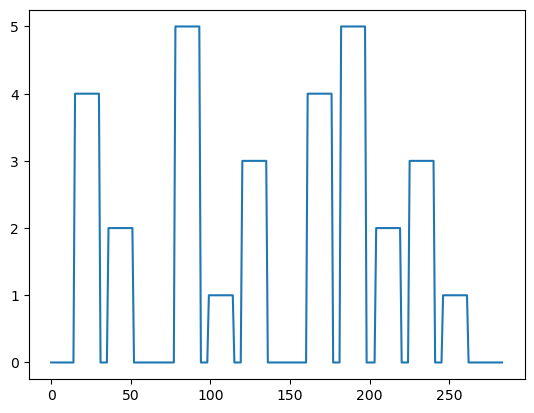

In [295]:
import scipy.io

# Load the .mat file
filepath=os.path.join(paradigm_dir,str(subject)+'_Regressor_tfMRI_'+tasktype+'_RL.mat')
data = scipy.io.loadmat(filepath)

print(data['Regressor'].shape)
plt.plot(data['Regressor'][0])
regressor=data['Regressor']

# Flatten the regressor to 1D if necessary
regressor_flat = regressor.flatten()
regressor_flat

#check that dimensions match
assert data_4d.shape[3] == regressor_flat.shape[0] 

In [296]:
##TODO look better into the other regressors

In [297]:
# Initialize lists to store onset, duration, and condition (trial type)
onsets, durations, trial_types = [], [], []

# Identify events by iterating through the regressor
current_condition = regressor_flat[0]
start_time = 0  # Initial start time

for i, condition in enumerate(regressor_flat[1:], start=1):
    
    if condition != current_condition:
        
        # Append the onset, duration, and trial type of the previous condition
        onsets.append(start_time * TR)
        durations.append((i - start_time) * TR)
        trial_types.append(f'condition_{current_condition}')
        
        # Update for the new condition
        current_condition = condition
        start_time = i

# Add the last event
onsets.append(start_time * TR)
durations.append((len(regressor_flat) - start_time) * TR)
trial_types.append(f'condition_{current_condition}')

# Create the event file as a DataFrame
events = pd.DataFrame({
    'onset': onsets,
    'duration': durations,
    'trial_type': trial_types
})

#Remove condition 0 which is a the no-paradigm condition and reset indexes
events=events[events['trial_type']!="condition_0"]
events = events.reset_index(drop=True)
events

,onset,duration,trial_type
0,10.80,11.52,condition_4
1,25.92,11.52,condition_2
2,56.16,11.52,condition_5
3,71.28,11.52,condition_1
4,86.40,11.52,condition_3
5,115.92,11.52,condition_4
6,131.04,11.52,condition_5
7,146.88,11.52,condition_2
8,162.00,11.52,condition_3
9,177.12,11.52,condition_1


## More flexible GLM structure - I assign each condition acivation to a column

In [298]:
# Create a new trial_type column where each event occurrence has a unique identifier
condition_counts = events['trial_type'].value_counts().to_dict()

events2=copy.deepcopy(events)

# Modify the trial_type to include the index of each event occurrence
events2['trial_type'] = [f"{row['trial_type']}_{i}" 
                        for i, row in events.iterrows()]
print(events2)

    onset  duration     trial_type
0   10.80     11.52  condition_4_0
1   25.92     11.52  condition_2_1
2   56.16     11.52  condition_5_2
3   71.28     11.52  condition_1_3
4   86.40     11.52  condition_3_4
5  115.92     11.52  condition_4_5
6  131.04     11.52  condition_5_6
7  146.88     11.52  condition_2_7
8  162.00     11.52  condition_3_8
9  177.12     11.52  condition_1_9


-----
-----

# [Deprecated] - Visualizing previously shared GM mask

/media/RCPNAS/Data2/Flavia/ML_project/ML4SCIENCE/gm_mni.nii.gz


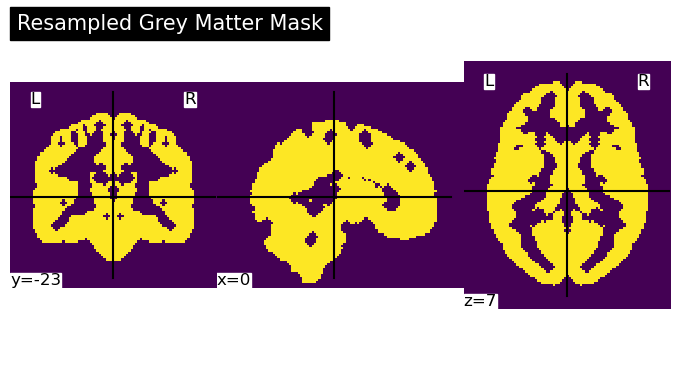

In [299]:
#Load the mask from giulia
relative_path = 'ML4SCIENCE/gm_mni.nii.gz'#resampled_gray_matter_mask_2mm.nii'

# Get the absolute path
absolute_path = os.path.abspath(relative_path)
print(absolute_path)
                                
mask_to_resample = nib.load(absolute_path)

# Load Target image (e.g., the brain image) to match the resolution and affine
# Assuming you have a brain image to match with:
brain_img = nib.load('ML4SCIENCE/FSLtemplates/MNI152_T1_2mm_brain.nii')

from nilearn.image import resample_img, new_img_like

# Resample the mask to match the brain image's space and resolution
resampled_mask_img = resample_img(mask_to_resample, target_affine=brain_img.affine, target_shape=brain_img.shape,
                                 interpolation='nearest')

# Plot the resampled gray matter mask
plot_img(resampled_mask_img, title="Resampled Grey Matter Mask", draw_cross=True)
plt.show()

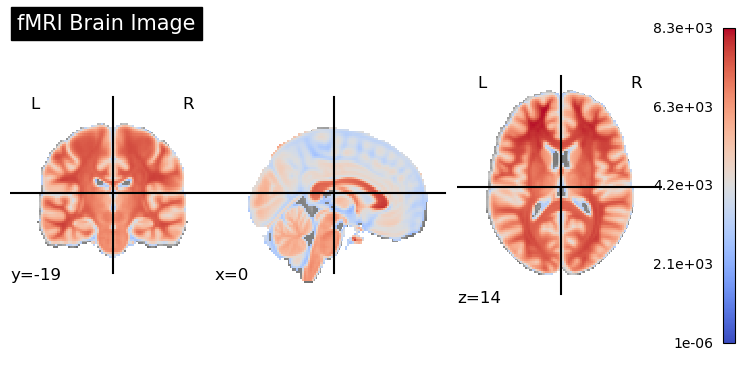

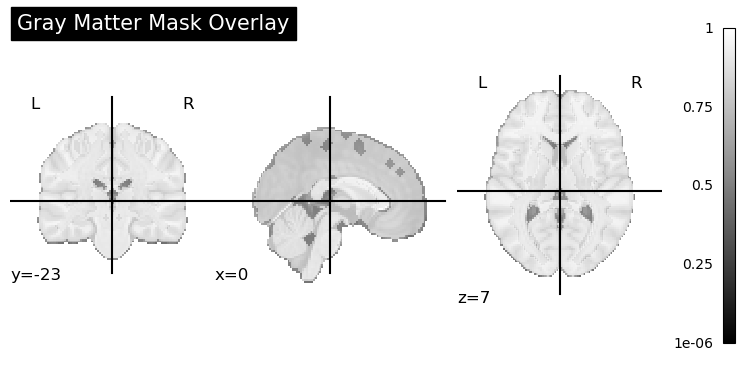

In [300]:
from nilearn import plotting

# Load the fMRI brain image and resampled gray matter mask
# Plot the fMRI brain image
plotting.plot_stat_map(brain_img, title="fMRI Brain Image", display_mode='ortho', draw_cross=True, cmap='coolwarm')

# Overlay the gray matter mask on top of the brain image
plotting.plot_stat_map(resampled_mask_img, title="Gray Matter Mask Overlay", display_mode='ortho', draw_cross=True, cmap='gray', alpha=0.5)

# Show the plot
plotting.show()

#Does not seem aligned?? I may need to build another one

In [301]:
##Commento: la mask non mi sembra ottima... vedo che nel file del soggetto dentro T1/Atlased c'è una gray matter mask e provo a usare quella

-----
----

# Using the custom, subject-defined gray matter mask

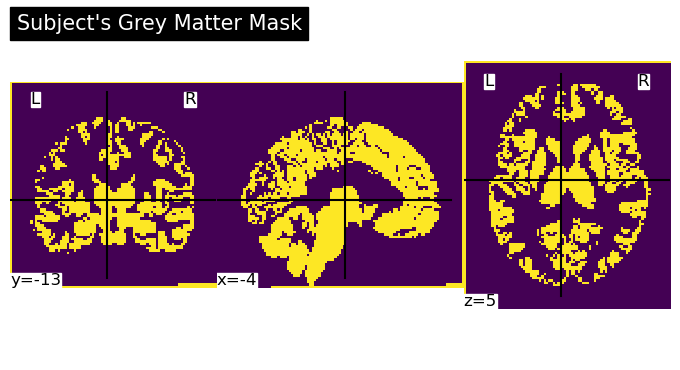

In [302]:
from nilearn.plotting import plot_img
import matplotlib.pyplot as plt
from scipy import ndimage

grey_matter_mask=os.path.join(fMRI_dir,subject,'T1/Atlased/GMmask.nii')

# Plot the resampled gray matter mask
plot_img(grey_matter_mask, title="Subject's Grey Matter Mask", draw_cross=True)

# Show the plot
plt.show()

There are some margins that are clearly an error of preprocessing... I manually remove them

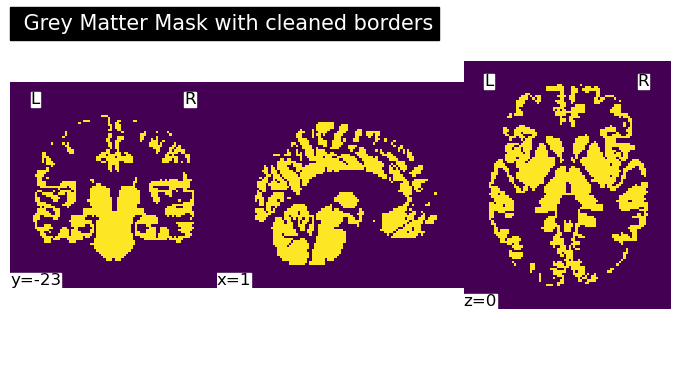

In [303]:
# Load the NIfTI file
nifti_image = nib.load(grey_matter_mask)
mask_data = nifti_image.get_fdata()

border_size=10

mask_data[:border_size, :, :] = 0  # Remove borders along the first dimension (x)
mask_data[-border_size:, :, :] = 0
mask_data[:, :border_size, :] = 0  # Remove borders along the second dimension (y)
mask_data[:, -border_size:, :] = 0
mask_data[:, :, :border_size] = 0  # Remove borders along the third dimension (z)
mask_data[:, :, -border_size:] = 0

new_mask_img = nib.Nifti1Image(mask_data, affine=nifti_image.affine, header=nifti_image.header)

# Plot the resampled gray matter mask
plot_img(new_mask_img, title=" Grey Matter Mask with cleaned borders", draw_cross=False)

In [304]:
# Saving it to plot it in mricron or similar visualization softwares (e.g. fsl) to visually check that all artifacts ahve been removed

# Save the 4D image as .nii.gz
filename=subject+'_gmcleaned.nii'
#saving_path='/home/fpetruso/tmp_ml4science/'+filename
#saving_path='/Users/flhi1/Documents/PhD/code/ML4SCIENCE/'+filename
#saving_path='/data/PhD/code/ML4SCIENCE/'+filename

nib.save(new_mask_img, filename)

## I fit the GLM with the grey matter mask

In [305]:
import nilearn
from nilearn.glm.first_level import make_first_level_design_matrix, FirstLevelModel
from nilearn.plotting import plot_design_matrix
# Specify what sort of GLM we want (nature of the noise, repetition time of the data and other parameters)

#Run the GLM with the mask
fmri_glm = FirstLevelModel(mask_img=new_mask_img,# !!! Grey matter mask added-----
                           t_r=TR,
                           noise_model='ar1', #or ols 
                           standardize=False,
                           hrf_model='spm',
                           drift_model=None) #Not necessary, nuisance covariates have already been removed

# Fit the model to our design and data
fmri_glm = fmri_glm.fit(new_img, events2) #Use "events" for the other design

In [306]:
#The warning should be okay as it is just telling me that the data are centered 

## Plot the design matrix

<Axes: label='conditions', ylabel='scan number'>

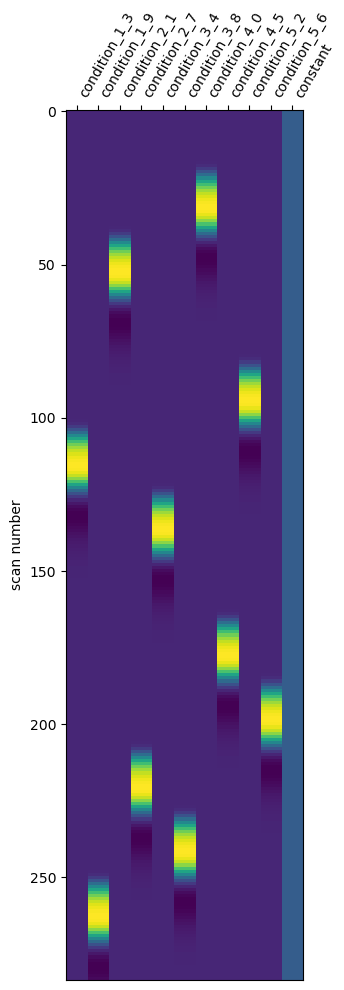

In [307]:
design_matrix = fmri_glm.design_matrices_[0]
plot_design_matrix(design_matrix)

## Create appropriate contrast vector for the F-statistics

In [308]:
from nilearn.plotting import plot_contrast_matrix
from nilearn import plotting

n_regressors = design_matrix.shape[1] #non usato per ora

contrast_matrix = np.diag(np.ones(n_regressors)) 
contrast_matrix[n_regressors-1,n_regressors-1]=0 

contrast_matrix = np.zeros((n_regressors-1, n_regressors))
np.fill_diagonal(contrast_matrix, 1)  # Identity matrix for joint F-test

print(contrast_matrix)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


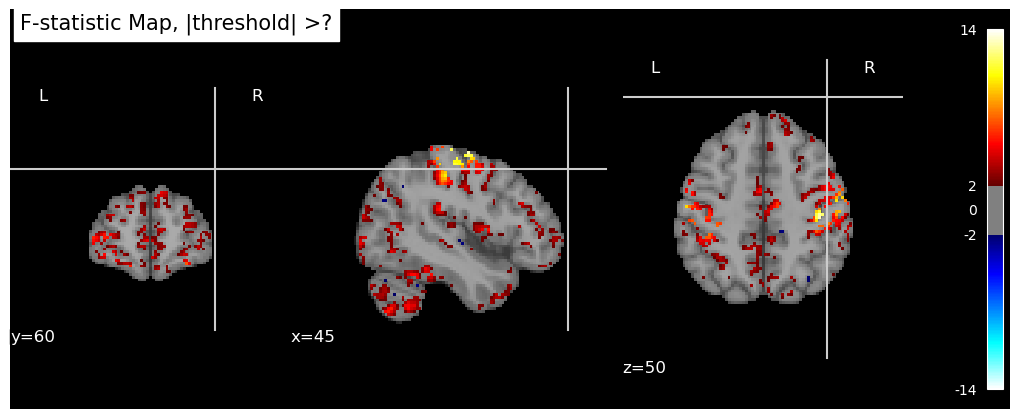

In [309]:
# Compute the contrast for an F-test and save the map to a file if needed
f_test_result = fmri_glm.compute_contrast(contrast_matrix, stat_type='F')
f_test_result.to_filename('f_stat_map.nii')  

plotting_config = {
    "display_mode": "ortho",  # "ortho" for three orthogonal slices
    "cut_coords": (45, 60, 50), 
    "black_bg": True
}
plotting.plot_stat_map(
    f_test_result,
    threshold=2,
    title="F-statistic Map, |threshold| >?",
    figure=plt.figure(figsize=(10, 4)),
    **plotting_config,
)
plt.show()

#Reason about selecting the threshold 

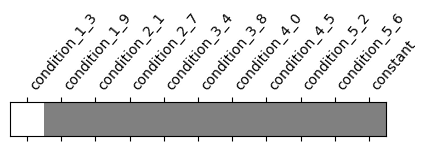

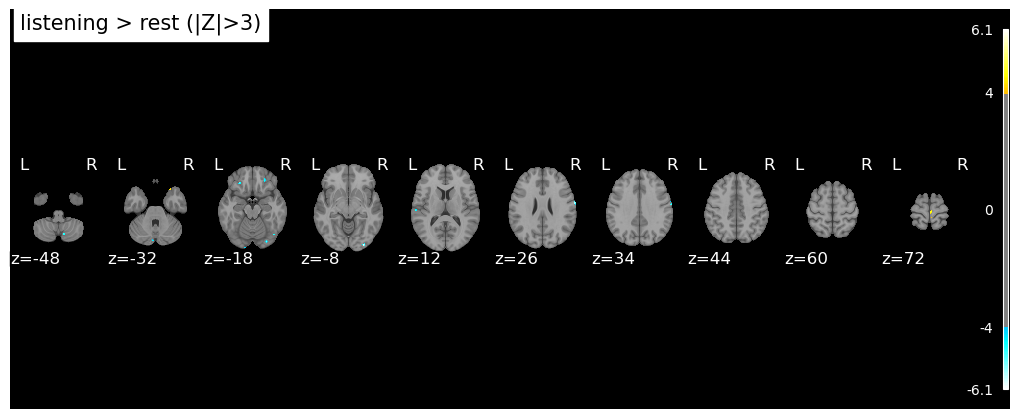

In [310]:
#Extra - trying individual regressors

from nilearn.plotting import plot_anat, plot_img, plot_stat_map, show, plot_contrast_matrix
n_regressors = design_matrix.shape[1] #non usato per ora

contrast_vector = np.zeros(n_regressors)
contrast_vector[-1]=0
contrast_vector[0]=1

plot_contrast_matrix(contrast_def=contrast_vector, design_matrix=design_matrix)
z_map = fmri_glm.compute_contrast(contrast_vector, output_type="z_score") #contrast_vector

plotting_config = {
    #"bg_img": mean_img,
    "display_mode": "z",
    "cut_coords": 10,
    "black_bg": True,
}
plot_stat_map(
    z_map,
    threshold=4,
    title="listening > rest (|Z|>3)",
    figure=plt.figure(figsize=(10, 4)),
    **plotting_config,
)
show()

In [284]:
###The idea is to select a certaim percentage of voxels based on their values on the F-maps (or other maps)